# Controlador PID

In [1]:
import numpy as np
import control as ctrl
import ipywidgets as widgets
import matplotlib.pyplot as plt

from get_kr import get_kr
from ipywidgets import interact, interactive, fixed, interact_manual

%matplotlib widget

In [2]:
Kp = 1
Ki = 1
Kd = 1

s = ctrl.tf('s')
PID = Kp + Ki/s + Kd*s
PID

TransferFunction(array([1, 1, 1]), array([1, 0]))

## Característica de los términos P, I y D

| **RESPUESTA LC** | **TIEMPO LEVANTAMIENTO** | **SOBRETIRO** | **TIEMPO ASENTAMIENTO** | **ERROR E-E** |
|:----------------:|:------------------------:|:-------------:|:-----------------------:|:-------------:|
|      $K_{p}$     |        Decrementa        |   Incrementa  |      Pequeño Cambio     |   Decrementa  |
|      $K_{i}$     |        Decrementa        |   Incrementa  |        Incrementa       |   Decrementa  |
|      $K_{d}$     |      Pequeño Cambio      |   Decrementa  |        Decrementa       |   Sin Cambio  |

### Ejemplo práctico

In [3]:
# Parametros del sistema
m = 1 # [kg]
b = 10 # [N s/m]
k = 20 # [N/m]

A = np.array([[0, 1],
              [-k/m, -b/m]])

B = np.array([[0],
              [1/m]])

C = np.array([1, 0])

D = 0

mass_springd_ss = ctrl.ss(A, B, C, D)

mass_springd_tf = ctrl.ss2tf(mass_springd_ss)
mass_springd_tf

TransferFunction(array([1.]), array([ 1., 10., 20.]))

#### Respuesta en lazo abierto

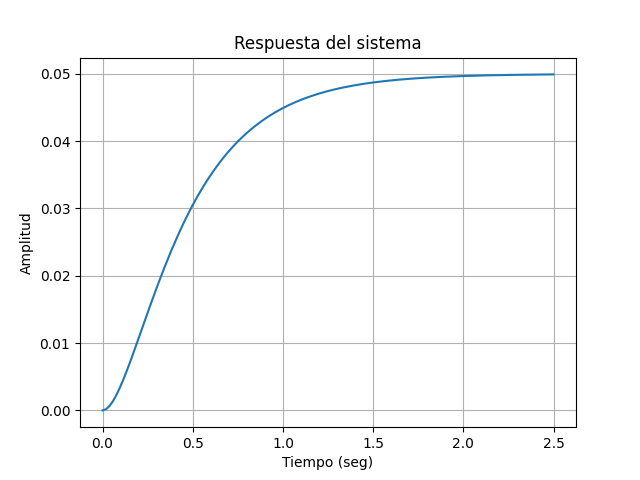

In [4]:
t, y = ctrl.step_response(mass_springd_tf)

plt.figure()
plt.plot(t,y)
plt.title('Respuesta del sistema')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Amplitud')
plt.grid('both')
plt.show()

#### Control Proporcional

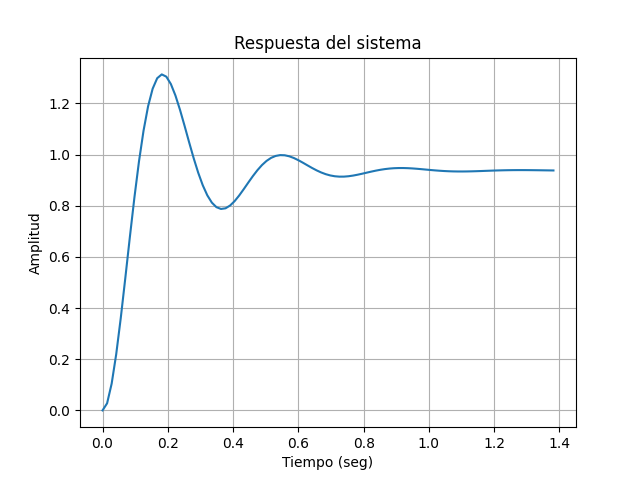

In [21]:
Kp = 300

mass_springd_P = ctrl.feedback(mass_springd_tf*Kp)
mass_springd_P

t, y = ctrl.step_response(mass_springd_P)

plt.figure()
plt.plot(t, y)
plt.title('Respuesta del sistema')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Amplitud')
plt.grid('both')
plt.show()

#### Control Proporcional-Derivativo

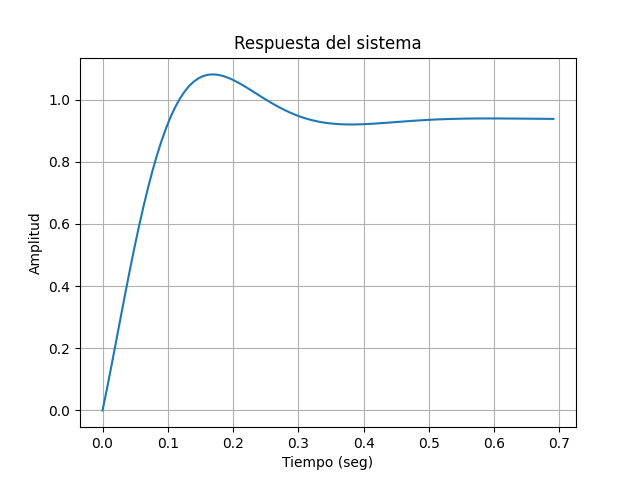

In [24]:
Kp = 300
Kd = 10

s = ctrl.tf('s')
PD = Kp + Kd*s

mass_springd_PD = ctrl.feedback(mass_springd_tf*PD)
mass_springd_PD

t, y = ctrl.step_response(mass_springd_PD)

plt.figure()
plt.plot(t, y)
plt.title('Respuesta del sistema')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Amplitud')
plt.grid('both')
plt.show()

#### Control Proporcional-Integral

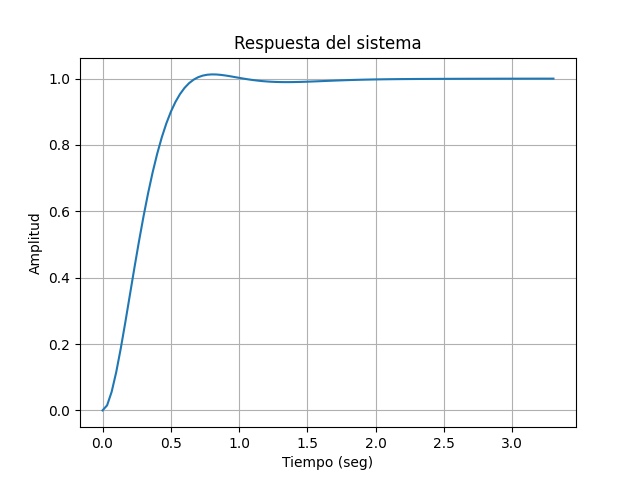

In [7]:
Kp = 30
Ki = 70

s = ctrl.tf('s')
PI = Kp + Ki/s

mass_springd_PI = ctrl.feedback(mass_springd_tf*PI)
mass_springd_PI

t, y = ctrl.step_response(mass_springd_PI)

plt.figure()
plt.plot(t, y)
plt.title('Respuesta del sistema')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Amplitud')
plt.grid('both')
plt.show()

#### Control Proporcional-Integral-Derivativo


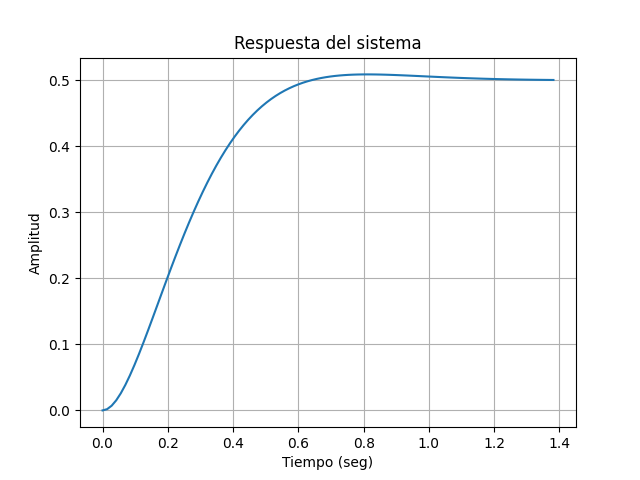

In [8]:
Kp = 20
Ki = 0
Kd = 0

s = ctrl.tf('s')
PID = Kp + Ki/s + Kd*s

mass_springd_PID = ctrl.feedback(mass_springd_tf*PID)
mass_springd_PID

t, y = ctrl.step_response(mass_springd_PID)

plt.figure()
plt.plot(t, y)
plt.title('Respuesta del sistema')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Amplitud')
plt.grid('both')
plt.show()

## Consideraciones para el diseño del control PID

In [9]:
def mass_spring_damp(Kp, Ki, Kd):
    # Parametros del sistema
    m = 1 # [kg]
    b = 10 # [N s/m]
    k = 20 # [N/m]

    A = np.array([[0, 1],
                [-k/m, -b/m]])

    B = np.array([[0],
                [1/m]])

    C = np.array([1, 0])

    D = 0

    mass_springd_ss = ctrl.ss(A, B, C, D)

    mass_springd_tf = ctrl.ss2tf(mass_springd_ss)

    s = ctrl.tf('s')
    PID = Kp + Ki/s + Kd*s

    mass_springd_PID = ctrl.feedback(mass_springd_tf*PID)
    mass_springd_PID

    t = np.arange(0, 2, 0.01)
    _, yout = ctrl.step_response(mass_springd_PID, T = t)
    
    plt.plot(t, yout)
    plt.xlabel('Time [sec]')
    plt.ylabel('Amplitude')
    plt.grid('on')

In [10]:
interactive(mass_spring_damp, Kp = (1e-5, 500, 5), Ki = (1e-5, 500, 5), Kd = (1e-5, 500, 5))

interactive(children=(FloatSlider(value=245.00001, description='Kp', max=500.0, min=1e-05, step=5.0), FloatSli…

## Método de Ziegler-Nichols

| Control |    $K_{p}$     |  $\tau_{i}$            |  $\tau_{d}$    |
|:-------:|:--------------:|:----------------------:|:--------------:|
|    P    |  0.5 $K_{cr}$  |   $\infty$             |       0        |
|    PI   | 0.45 $K_{cr}$  | $\frac{1}{1.2}P_{cr}$  |       0        |
|   PID   |  0.6 $K_{cr}$  |  0.5 $P_{cr}$          | 0.125 $P_{cr}$ |

In [11]:
def system_tf_zn(Kp):
    s = ctrl.tf('s')
    
    system_tf = (30)/(s**4 + 10*s**3 + 35*s**2 + 50*s + 24)

    #Kp = 0.6*Kcr
    #tau_i = 0.5*Pcr
    tau_i = np.inf
    #tau_d = 0.125*Pcr
    tau_d = 0
    #PID = Kp*(1 + 1/(tau_i*s) + tau_d*s)
    PID = Kp

    system_tf_PID = ctrl.feedback(system_tf*PID)
    system_tf_PID

    t = np.arange(0, 10, 0.001)
    _, yout = ctrl.step_response(system_tf_PID, T = t)
    
    plt.figure()
    plt.plot(t, yout)
    plt.xlabel('Time [sec]')
    plt.ylabel('Amplitude')
    plt.grid('both')
    plt.show()

In [12]:
interactive(system_tf_zn, Kp = (1e-5, 10, 0.1))

interactive(children=(FloatSlider(value=4.90001, description='Kp', max=10.0, min=1e-05), Output()), _dom_class…

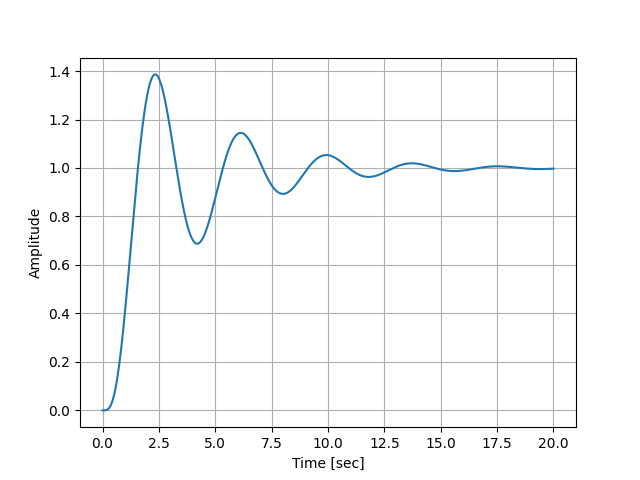

In [13]:
# PI Control
Kcr = 4.20
Pcr = 2.80
Kp = 0.45*Kcr
tau_i = 0.83*Pcr
tau_d = 0

s = ctrl.tf('s')
    
system_tf = (30)/(s**4 + 10*s**3 + 35*s**2 + 50*s + 24)

PD = Kp*(1 + 1/(tau_i*s) + tau_d*s)

system_tf_PD = ctrl.feedback(system_tf*PD)
system_tf_PD

t = np.arange(0, 20, 0.001)
_, yout = ctrl.step_response(system_tf_PD, T = t)

plt.figure()
plt.plot(t, yout)
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.grid('both')

Kp: 2.5200
Ki: 1.7936
Kd: 0.8851


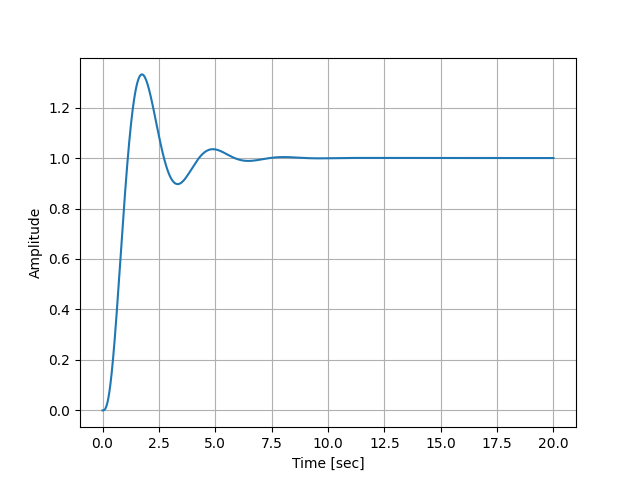

In [14]:
# PID Control
Kcr = 4.20
Pcr = 2.81
Kp = 0.6*Kcr
tau_i = 0.5*Pcr
tau_d = 0.125*Pcr

print("Kp: %.4f\nKi: %.4f\nKd: %.4f" % (Kp, Kp/tau_i, Kp*tau_d))

s = ctrl.tf('s')
    
system_tf = (30)/(s**4 + 10*s**3 + 35*s**2 + 50*s + 24)

PID = Kp*(1 + 1/(tau_i*s) + tau_d*s)

system_tf_PID = ctrl.feedback(system_tf*PID)
system_tf_PID

t = np.arange(0, 20, 0.001)
_, yout = ctrl.step_response(system_tf_PID, T = t)

plt.figure()
plt.plot(t, yout)
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.grid('both')